# Logistic Regression

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from IPython.display import Markdown

import numpy as np
import random as rnd
import seaborn as sns

In [2]:
N_SEED = 19
TOP_K = 10

np.random.seed(N_SEED)
rnd.seed(N_SEED)
COLOR_MAP = "Spectral"

## Self-created dataset

In [3]:
X = np.array([[1.0], [2.0], [3.0], [4.0], [4.5], [5.5]])
y = np.array([0.0, 0.0, 0.0, 1.0, 1.0, 1.0])
X_test = np.array([[3], [5.1]])
y_test = np.array([[0.0], [1.0]])

### Create a model and fit data into the model

In [4]:
lgr_model = LogisticRegression(
    random_state=N_SEED,
    n_jobs = 2
).fit(X, y)

### Predict

In [5]:
y_lgr_pred = lgr_model.predict(np.array(X_test))
y_lgr_pred

array([0., 1.])

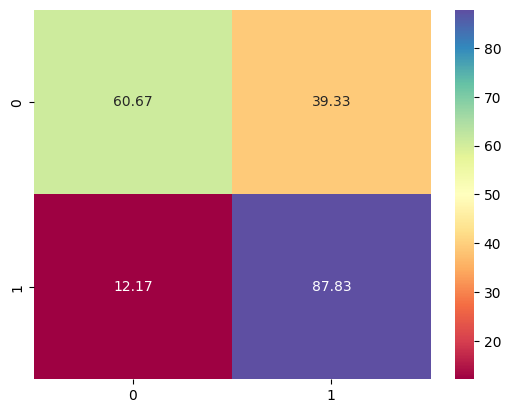

In [6]:
y_lgr_p = lgr_model.predict_proba(X_test) * 100
sns.heatmap(y_lgr_p, annot=True, cmap=COLOR_MAP, fmt=".2f");

## Iris dataset (classification problem)

In [7]:
X1, y1 = load_iris(return_X_y=True)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=N_SEED)

### Create a model and fit data into the model

In [8]:
lgr_model1 = LogisticRegression(
    random_state=N_SEED,
    n_jobs = 2,
    max_iter=150,
).fit(X1_train, y1_train)

### Predict

In [9]:
y1_lgr_pred = lgr_model1.predict(X1_test)
y1_lgr_pred[:TOP_K]

array([0, 2, 1, 1, 0, 0, 0, 0, 1, 2])

In [10]:
y1_test[:TOP_K]

array([0, 2, 1, 1, 0, 0, 0, 0, 1, 2])

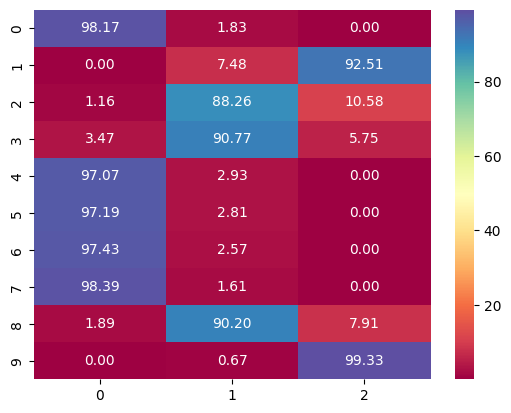

In [11]:
y1_lgr_p = lgr_model1.predict_proba(X1_test) * 100
y1_lgr_p[:TOP_K]
sns.heatmap(y1_lgr_p[:TOP_K], annot=True, cmap=COLOR_MAP, fmt=".2f");

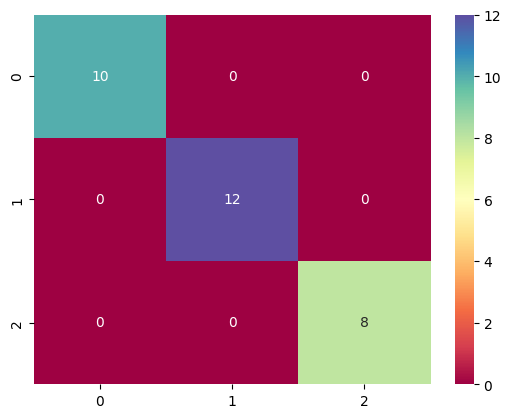

In [12]:
cm1_lgr = confusion_matrix(y_true=y1_test, y_pred=y1_lgr_pred)
sns.heatmap(cm1_lgr, annot=True, cmap=COLOR_MAP, fmt=".0f");

In [13]:
Markdown(classification_report(y_true=y1_test, y_pred=y1_lgr_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30
